# Desafío - Predicción de renuncia de clientes

## Importar Librerias

In [73]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

# Modelo con Keras y TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Modelos
from sklearn.ensemble import RandomForestClassifier

# Balanceo con SMOTE
from imblearn.over_sampling import SMOTE


In [74]:
#importar datos .csv
df = pd.read_csv('/content/Customer Churn.csv')
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [75]:
# Limpiar nombres de columnas quitando espacios al inicio y al final
df.columns = df.columns.str.strip().str.replace(' +', '_', regex=True)

In [76]:
#realizamos un analis exploratorio de los datos usando una funcion ya definida y que hemos usado enotros datasets
import EDA_V2
from EDA_V2 import calidad_datos
calidad_datos(df)

,tipo_dato,nulos,porcentaje_nulos,valores_unicos,ceros,porcentaje_ceros,outliers,porcentaje_outliers,media,desviacion_std,coef_variacion,asimetria,curtosis,moda
Call_Failure,int64,0,0.0,37,702,22.285714,47,1.492063,7.627937,7.263886,0.952274,1.089752,0.906821,0.0
Complains,int64,0,0.0,2,2909,92.349206,241,7.650794,0.076508,0.265851,3.474820,3.187956,8.168250,0.0
Subscription_Length,int64,0,0.0,45,0,0.000000,282,8.952381,32.541905,8.573482,0.263460,-1.300015,1.215842,36.0
Charge_Amount,int64,0,0.0,11,1768,56.126984,370,11.746032,0.942857,1.521072,1.613258,2.584868,8.854358,0.0
Seconds_of_Use,int64,0,0.0,1756,154,4.888889,200,6.349206,4472.459683,4197.908687,0.938613,1.321943,0.993676,0.0
Frequency_of_use,int64,0,0.0,242,154,4.888889,129,4.095238,69.460635,57.413308,0.826559,1.144166,0.820125,0.0
Frequency_of_SMS,int64,0,0.0,405,603,19.142857,368,11.682540,73.174921,112.237560,1.533826,1.974142,3.258540,0.0
Distinct_Called_Numbers,int64,0,0.0,92,154,4.888889,77,2.444444,23.509841,17.217337,0.732346,1.029402,1.359990,0.0
Age_Group,int64,0,0.0,5,0,0.000000,170,5.396825,2.826032,0.892555,0.315833,0.473642,0.205135,3.0
Tariff_Plan,int64,0,0.0,2,0,0.000000,245,7.777778,1.077778,0.267864,0.248534,3.154514,7.956007,1.0


In [77]:
#Probaremos ydata_profiling para EDA
!pip install ydata_profiling

In [78]:
from ydata_profiling import ProfileReport
df_report = ProfileReport(df)
df_report

Output hidden; open in https://colab.research.google.com to view.

el data set parece estar limpio y no necesita mayor procesamiento, hay una sola variable que podriamos hacer un cambio y es en age group que tiene 5 valores distintos

In [79]:
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)

# Separar variables independientes (X) y la dependiente (y)

In [80]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Escalar las variables

In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar los datos en entrenamiento y prueba

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear una red neuronal feedforward

In [83]:
# Crear el modelo secuencial
model = Sequential()

# Capa de entrada + primera capa oculta
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Segunda capa oculta
model.add(Dense(16, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Salida binaria (0 o 1)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7143 - loss: 0.5828 - val_accuracy: 0.8909 - val_loss: 0.3646
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8804 - loss: 0.3410 - val_accuracy: 0.9107 - val_loss: 0.2383
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8999 - loss: 0.2324 - val_accuracy: 0.9187 - val_loss: 0.2100
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9147 - loss: 0.1959 - val_accuracy: 0.9206 - val_loss: 0.2022
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9196 - loss: 0.1870 - val_accuracy: 0.9167 - val_loss: 0.1980
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9125 - loss: 0.1964 - val_accuracy: 0.9187 - val_loss: 0.1948
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9144 - loss: 0.1879 - val_accuracy: 0.9127 - val_loss: 0.2000
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9191 - loss: 0.1806 - val_accuracy: 0.9147 - val

# Visualizar el entrenamiento

In [84]:
# Convertir el historial a DataFrame
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1

# Graficar la precisión (accuracy)
fig = px.line(
    hist_df,
    x='epoch',
    y=['accuracy', 'val_accuracy'],
    labels={'value': 'Accuracy', 'epoch': 'Epoch'},
    title='Accuracy vs Validation Accuracy (Plotly)'
)
fig.show()

# Evaluación del modelo

In [85]:
# Evaluar en datos de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9349 - loss: 0.1527 
Accuracy: 0.9206


# Análisis distribución “Subscription Length” por Churn

In [86]:
fig = px.histogram(
    df,
    x='Subscription_Length',
    color='Churn',
    barmode='overlay',
    nbins=30,
    histnorm='probability density',
    title='Distribución de Subscription Length por clase Churn'
)
fig.update_traces(opacity=0.6)
fig.show()

# Estadísticas descriptivas por clase
print(df.groupby('Churn')['Subscription_Length'].describe())

        count       mean       std  min   25%   50%   75%   max
Churn                                                          
0      2655.0  32.662524  8.392357  3.0  29.0  35.0  38.0  47.0
1       495.0  31.894949  9.469163  3.0  31.0  35.0  37.0  45.0


El promedio de meses suscrito es ligeramente menor en los que renunciaron (31.89) que en los que no (32.66).
La variabilidad (desviación estándar) es un poco mayor en los que renunciaron (9.47 vs 8.39), lo que puede indicar que hay más heterogeneidad en el tiempo de suscripción de los churners.
Los valores mínimos y máximos son muy similares para ambos grupos.

# Mostrar frecuencia de clases y balancear con SMOTE

In [87]:
# Frecuencia de clases antes de balancear
print("Frecuencia original de clases:")
print(y.value_counts())

# Gráfico frecuencia
churn_counts = y.value_counts().reset_index()
churn_counts.columns = ['Churn', 'count']

fig = px.bar(churn_counts, x='Churn', y='count',
             labels={'Churn': 'Clase Churn', 'count': 'Frecuencia'},
             title='Frecuencia de clases (Churn)')
fig.show()

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Frecuencia después de SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Dividir en train y test (33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42, stratify=y_resampled
)

Frecuencia original de clases:
Churn
0    2655
1     495
Name: count, dtype: int64


Frecuencia después de SMOTE:
Churn
0    2655
1    2655
Name: count, dtype: int64


en la grafica se puede observar el desbalance entre ambas clases siendo los no renunciantes mayores, despues de aplicar SMOTE se observa el balance y se dividen los datos balanceados

# Entrenar Random Forest y mostrar métricas e importancia

In [88]:
# Entrenar RandomForest con parámetros por defecto
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predecir en test
y_pred = rf.predict(X_test)

# Mostrar reporte con F1-score
print("Reporte clasificación Random Forest:")
print(classification_report(y_test, y_pred))

# Importancia de características
importances = rf.feature_importances_
feature_names = df.drop('Churn', axis=1).columns

# Crear DataFrame con importancia
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

print("Top 7 características importantes:")
print(feat_imp_df.head(7))

Reporte clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       877
           1       0.96      0.99      0.98       876

    accuracy                           0.97      1753
   macro avg       0.98      0.97      0.97      1753
weighted avg       0.98      0.97      0.97      1753

Top 7 características importantes:
                    feature  importance
9                    Status    0.211601
1                 Complains    0.116236
2       Subscription_Length    0.112061
5          Frequency_of_use    0.101605
11           Customer_Value    0.097105
4            Seconds_of_Use    0.094421
7   Distinct_Called_Numbers    0.073480


El modelo Random Forest funciona muy bien con alta precisión y recall para ambas clases, lo que significa que predice con buena fiabilidad tanto quién renuncia como quién no.
Las variables identificadas dan pistas claras para acciones de retención: por ejemplo, clientes con cierto Status o que han hecho quejas son prioritarios para campañas preventivas.
El balanceo con SMOTE y el preprocesamiento fueron adecuados para manejar el desbalance original.

# Red neuronal con 7 características más importantes

Epoch 1/100
89/89 - 1s - 16ms/step - AUC: 0.6900 - loss: 0.6689 - val_AUC: 0.8457 - val_loss: 0.6005
Epoch 2/100
89/89 - 0s - 4ms/step - AUC: 0.8835 - loss: 0.5414 - val_AUC: 0.8993 - val_loss: 0.5167
Epoch 3/100
89/89 - 0s - 4ms/step - AUC: 0.9110 - loss: 0.4757 - val_AUC: 0.9078 - val_loss: 0.4675
Epoch 4/100
89/89 - 0s - 4ms/step - AUC: 0.9150 - loss: 0.4353 - val_AUC: 0.9086 - val_loss: 0.4353
Epoch 5/100
89/89 - 0s - 5ms/step - AUC: 0.9153 - loss: 0.4083 - val_AUC: 0.9080 - val_loss: 0.4134
Epoch 6/100
89/89 - 1s - 6ms/step - AUC: 0.9157 - loss: 0.3893 - val_AUC: 0.9085 - val_loss: 0.3978
Epoch 7/100
89/89 - 0s - 4ms/step - AUC: 0.9165 - loss: 0.3755 - val_AUC: 0.9088 - val_loss: 0.3860
Epoch 8/100
89/89 - 1s - 9ms/step - AUC: 0.9176 - loss: 0.3651 - val_AUC: 0.9094 - val_loss: 0.3772
Epoch 9/100
89/89 - 0s - 4ms/step - AUC: 0.9186 - loss: 0.3570 - val_AUC: 0.9101 - val_loss: 0.3701
Epoch 10/100
89/89 - 1s - 6ms/step - AUC: 0.9197 - loss: 0.3506 - val_AUC: 0.9112 - val_loss: 0.364

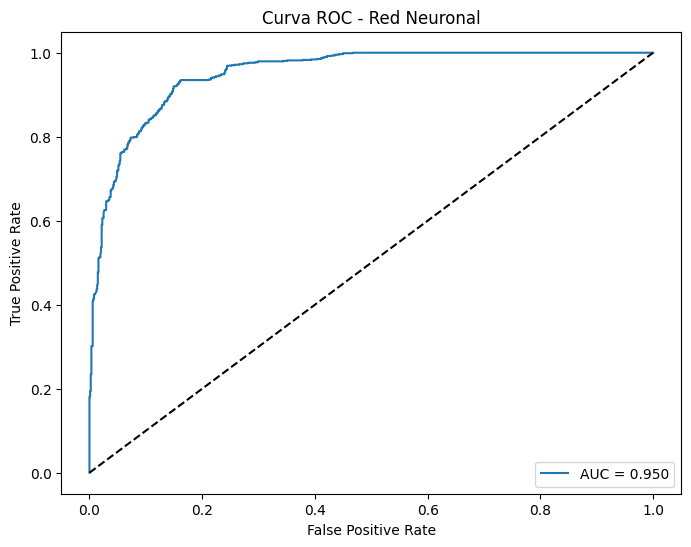

In [89]:
# Filtrar las 7 características más importantes
top7_features = feat_imp_df['feature'].head(7).values

# Filtrar train y test con esas columnas
X_train_top7 = X_train[:, [list(feature_names).index(feat) for feat in top7_features]]
X_test_top7 = X_test[:, [list(feature_names).index(feat) for feat in top7_features]]

# Crear modelo secuencial con 1 capa oculta
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(7,)))  # capa oculta con 16 neuronas
model.add(Dense(1, activation='sigmoid'))  # salida binaria

# Configurar optimizador SGD con learning rate ajustado
optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

# Entrenar modelo (ajusta epochs para alcanzar AUC > 0.90)
history = model.fit(X_train_top7, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluar en test
results = model.evaluate(X_test_top7, y_test, verbose=0)
print(f"\nTest Loss: {results[0]:.4f}, Test AUC: {results[1]:.4f}")

# Curva ROC y AUC
y_pred_prob = model.predict(X_test_top7).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Red Neuronal')
plt.legend(loc='lower right')
plt.show()

La red neuronal con las 7 variables importantes logra un desempeño muy sólido, similar o mejor que el Random Forest.
La métrica AUC al 0.95 indica que el modelo es muy confiable para detectar churn, algo clave para tomar acciones de retención.